# Here you run your code to model the data
Evaluation
Evaluate how well your work solves the stated business problem.

Questions to consider:

How do you interpret the results?
How well does your model fit your data? How much better is this than your baseline model?
How confident are you that your results would generalize beyond the data you have?
How confident are you that this model would benefit the business if put into use?
Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

What would you recommend the business do as a result of this work?
What are some reasons why your analysis might not fully solve the business problem?
What else could you do in the future to improve this project?




<img src="Images/logo.png">

# <center>Microsoft Movie Studio</center>

# Overview
***

#Overview A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This project explores different movie analytics from the last 10 years to provide insights regarding ... for Microsoft's new Movie Studio. 

Exploritory analysis of movie ratings and genre data shows us the associations between a movies average IMDB rating and the genre, as well as the number of movie productions within that genre.

The project also gathers top 10 directors from Rotton Tomatos as well as the average ratings for all their movies.

Three concrete business recommendations

We can use these analyses to provide an actionable insights into what types of movies would be most beneficial for Microsoft's Movie Studio to produce, as well as people who would be beneificial to have star and direct.

# Business Problem

***

#Business Problem Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

**hello**

***
Questions to Consider:
* What ...
***

[link] ()

1. hello
2. hello


``` code block```

In [ ]:
# Questions to consider:

# What are the business's pain points related to this project? How did you pick the data analysis question(s) that you did? Why are these questions important from a business perspective? Data Understanding Describe the data being used for this project.

# Questions to consider:

# Where did the data come from, and how do they relate to the data analysis questions? What do the data represent? Who is in the sample and what variables are included? What is the target variable? What are the properties of the variables you intend to use?

# Data Understanding
---

The data used in this project is gathered from IMDB, Rotton Tomatoes, Box Office Mojo, The Movie Database, and The Numbers.


***
### Questions I Will Be Analysing

1. What is the distribution of movie ratings and genres?
2. What are the top 5 actors and directors?
3. 

# Import Packages
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
***

## Data Exploration

In [1]:
# picture of the different tables and how they connect (sql style with primary keys, foreign keys, and how they relate, etc?)

In [ ]:
#explaination of data being read in

## Data Preparation

```read_csv``` for all necessary data files

In [2]:
#CSV files needed for visualization of genre and ratings
imdb_title = pd.read_csv("Data/imdb.title.basics.csv.gz")
imdb_ratings = pd.read_csv("Data/imdb.title.ratings.csv.gz")

In [3]:
#CSV files needed for analyzing most popular people (directors and actors)
imdb_names = pd.read_csv("Data/imdb.name.basics.csv.gz")

In [82]:
#CSV files for finding top directors and their average movie ratings
rt_movies = pd.read_csv("Data/rt.movie_info.tsv.gz", sep='\t')
rt_reviews = pd.read_csv("Data/rt.reviews.tsv.gz", sep='\t', encoding = "ISO-8859-1")

In [264]:
rt_movies.shape

(1560, 12)

### Data Merging

In [4]:
#merge movie titles and ratings based on their common column 'tconst'
imdb_title_ratings = pd.merge(imdb_title, imdb_ratings, left_on='tconst', right_on='tconst')
imdb_title_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Data Cleaning

1. Clean up IMDB Title and Ratings Dataframes

In [5]:
# remove any rows with NULL values in the Genre column for the IMDB titles/ratings dataframe
imdb_title_ratings_drop = imdb_title_ratings.dropna(subset=['genres'])

In [6]:
#Create a generalized list of popular genres to group movies into based on their 'genre' column
genres = ['Action', 'Comedy', 'Horror', 'Western', 'Documentary', 'Mystery', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance', 'Sci-Fi', 'Biography']

2. Clear up Rotton Tomatoes Dataframe

In [192]:
#Drop rows with NULL values in the rating column as well as any rows with Ratings that are unintelligable
rt_reviews_dropna = rt_reviews.dropna(subset=['rating'])
rt_reviews_drops = rt_reviews_dropna[(rt_reviews_dropna['rating'] != 'T') & \
                                  (rt_reviews_dropna['rating'] != 'N') & \
                                  (rt_reviews_dropna['rating'] != 'R') & \
                                  (rt_reviews_dropna['rating'] != '1-5') &\
                                  (rt_reviews_dropna['rating'] != '3 1/2') ]

In [154]:
#dictionary to map for converting ratings
grades = {'A+':9.9, 'A':9.5, 'A-':9.0, 'B+':8.9, 'B':8.5, 'B-':8.0, 'C+':7.9, 'C':7.5, 'C-':7.0, 'D+':6.9, 'D':6.5,'D-':6.0, 'F+':5.9, 'F':5.5, 'F-':5.0}

3. Clean up IMDB Names (potentially use????)

In [7]:
#remove any rows with NULL professions or titles in the IMDB Names dataframe
imdb_names_dropna = imdb_names.dropna(subset=['primary_profession', 'known_for_titles'])

### Data Engineering

1. Convert Rotton Tomatoes critics ratings into floats so we can take the average. Map any values necessary

In [237]:
#converts ratings to percents if rating contains '/'
def conv_rating(rating):
    if '/' in rating:
        r = rating.split('/')
        return float(r[0])/float(r[1])*10
    elif rating in grades:
        return grades[rating]
    else:
        return float(rating)

In [238]:
#pass each rating into conv_rating method
rt_reviews_drops['conv_ratings'] = rt_reviews_drops['rating'].map(lambda x: conv_rating(x))
rt_reviews_drops.head()

<ipython-input-238-6f55f182f286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews_drops['conv_ratings'] = rt_reviews_drops['rating'].map(lambda x: conv_rating(x))


,id,review,rating,fresh,critic,top_critic,publisher,date,conv_ratings
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",6.0
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",7.5
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",4.0
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",8.0
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",5.0


In [246]:
#Combine rows with matching ID column and take average of the ratings
rt_reviews_comb = rt_reviews_drops.groupby(['id'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()

In [243]:
#merge Rotton Tomato movie Dataframe with the Ratings Dataframe
rt_movie_rev = pd.merge(rt_movies, rt_reviews_comb, left_on='id', right_on='id')

In [276]:
#Create a list of the top 10 directors for visualization
top_directors = rt_movie_rev['director'].value_counts().index[:10].values

In [248]:
#Take only the ratings with indexes that have a director in the top 10
top_direct_ratings = rt_movie_rev.loc[rt_movie_rev['director'].isin(top_directors)]

In [249]:
#Group by again so we can take the average rating of all the directors movies
final_direct_ratings = top_direct_ratings.groupby(['director'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()

In [ ]:
#What variabels am I dropping or creating? why?

2. Use the rating column and the conv_ratings to see the distribution of movie ratings and how well it was perceived by critics

In [328]:
#use rt_movie_rev to also compare movie ratings to movie review ratings
mov_rating = rt_movie_rev['rating'].value_counts().sort_index()
mov_rating

G         41
NR       242
PG       193
PG-13    206
R        433
Name: rating, dtype: int64

In [273]:
rt_movie_rev.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,conv_ratings
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,6.398673
1,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,6.945000
2,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,5.995122
3,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,7.142500
4,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,5.941803


In [331]:
#Group movies by ratings into individual dataframes
ratings = rt_movie_rev['rating'].value_counts().sort_index().index
num_movies = rt_movie_rev['rating'].value_counts().sort_index().values

array([ 41, 242, 193, 206, 433])

In [325]:
avg_rating_by_rated = rt_movie_rev.groupby(['rating'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()
avg_rating_by_rated

,rating,conv_ratings
0,G,6.754107
1,NR,6.890182
2,PG,6.026328
3,PG-13,5.821686
4,R,6.152171


In [306]:
rated_list = avg_rating_by_rated['rating'].values
avg_ratings = avg_rating_by_rated['conv_ratings'].values

3. Find the average rating for movies in IMDB Dataframe. Combine Genre data to make comparable and easy to visualize

In [346]:
#iterate through each title in title list to find average rating. add avg rating to list on actor/director name
def find_rating(title_list):
    avg_rating = 0
    len_list = len(title_list)
    for title in title_list:
        row = imdb_ratings.loc[imdb_ratings['tconst'] == title]
        if len(row['averagerating'].values) > 0:
            avg_rating += row['averagerating'].values[0]
        else:
            len_list -= 1
    return avg_rating

In [347]:
#helper method to generalize genre
def find_genre(genre_list):
    for gen in genre_list:
        if gen in genres:
            return gen

In [353]:
#assigns one genre to movie to make easier to group and organize. Make copy beforehad to avoid warnings
imdb_title_ratings_map = imdb_title_ratings_drop.copy()
imdb_title_ratings_map['overall_genre'] = imdb_title_ratings_map['genres'].map(lambda x: find_genre(x.split(',')))

In [354]:
#groups genres into similar categories to make easier to visualize 
ratings_action_scifi = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Action') |(imdb_title_ratings_map['overall_genre'] == 'Sci_Fi') | (imdb_title_ratings_map['overall_genre'] == 'Fantasy')]
ratings_comedy = imdb_title_ratings_map[imdb_title_ratings_map['overall_genre'] == 'Comedy']
ratings_horror = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Thriller') | (imdb_title_ratings_map['overall_genre'] == 'Horror')]
ratings_drama = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Drama') | (imdb_title_ratings_map['overall_genre'] == 'Romance')]
ratings_nonfiction = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Biography') | (imdb_title_ratings_map['overall_genre'] == 'Documentary')]
ratings_other = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Family') | (imdb_title_ratings_map['overall_genre'] == 'Mystery') | \
                                          (imdb_title_ratings_map['overall_genre'] == 'Western') | (imdb_title_ratings_map['overall_genre'] == 'Other')]


In [ ]:
#How did you analyze or model the data? How did you iterate on your initial approach to make it better? Why are these choices appropriate given the data and the business problem?

# Visualizations
***

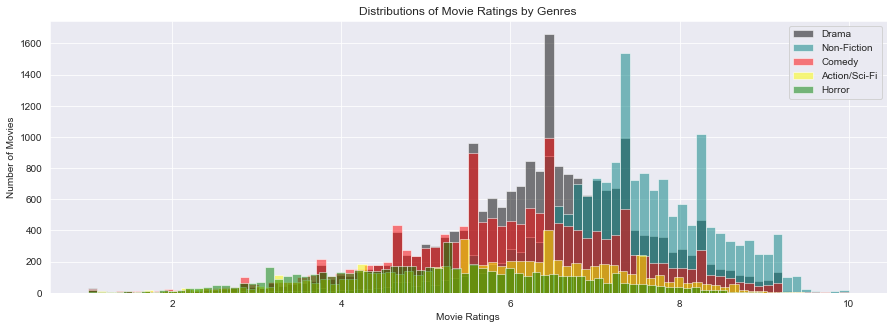

In [360]:
# Visualization for mapping a distribution of movie ratings by genre
fig, ax = plt.subplots(figsize=(15,5))
bins = 80

ax.hist(x=ratings_drama['averagerating'], label="Drama",
    bins=bins,
    color="black",
    alpha=0.5)
ax.hist(x=ratings_nonfiction['averagerating'], label="Non-Fiction",
    bins=bins,
    color="teal",
    alpha=0.5)
ax.hist(x=ratings_comedy['averagerating'], label="Comedy",
    bins=bins,
    color="red",
    alpha=0.5)
ax.hist(x=ratings_action_scifi['averagerating'], label="Action/Sci-Fi",
    bins=bins,
    color="yellow",
    alpha=0.5)
ax.hist(x=ratings_horror['averagerating'], label="Horror",
    bins=bins,
    color="green",
    alpha=0.5)


# Customize labels
ax.set_title("Distributions of Movie Ratings by Genres")
ax.set_xlabel("Movie Ratings")
ax.set_ylabel("Number of Movies")
ax.legend();

In [38]:
print('Average rating for Drama: {}'.format(ratings_drama['averagerating'].mean()))
print('Average rating for Non-Fiction: {}'.format(ratings_nonfiction['averagerating'].mean()))
print('Average rating for Comedy: {}'.format(ratings_comedy['averagerating'].mean()))
print('Average rating for Action/Sci-FI: {}'.format(ratings_action_scifi['averagerating'].mean()))
print('Average rating for Horror: {}'.format(ratings_horror['averagerating'].mean()))

Average rating for Drama: 6.3470974044097135
Average rating for Non-Fiction: 7.292722416048845
Average rating for Comedy: 6.005628121398386
Average rating for Action/Sci-FI: 5.806539581678581
Average rating for Horror: 5.108700999231361


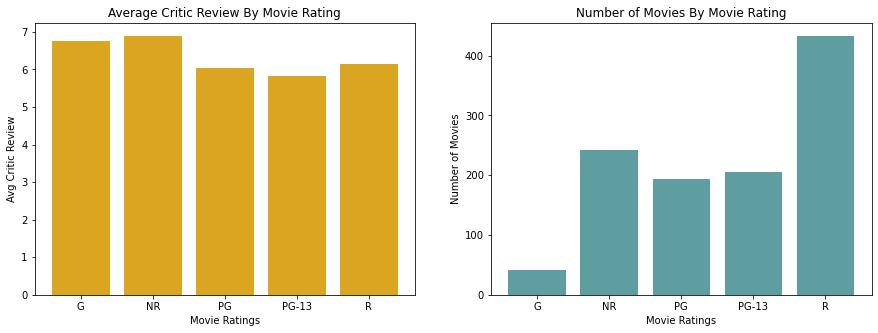

In [341]:
fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

bins = 80

ax.bar(rated_list, avg_ratings, color='goldenrod')
ax1.bar(ratings, num_movies, color='cadetblue')

# Customize labels
ax.set_title("Average Critic Review By Movie Rating")
ax.set_xlabel("Movie Ratings")
ax.set_ylabel("Avg Critic Review")

ax1.set_title("Number of Movies By Movie Rating")
ax1.set_xlabel("Movie Ratings")
ax1.set_ylabel("Number of Movies");


#Can do one graph # movies and then have the percent of that be high ratings


''

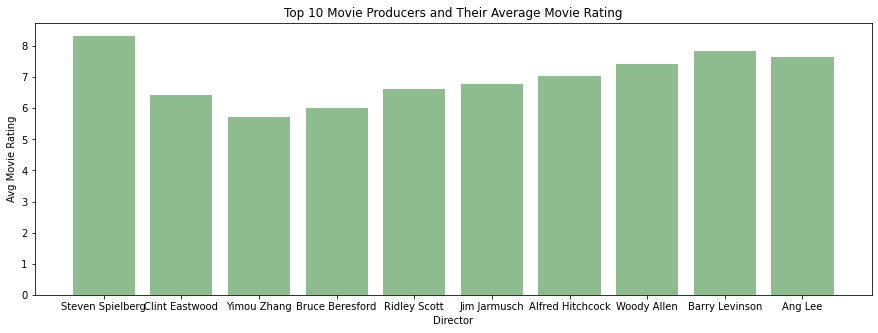

In [343]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(top_directors, final_direct_ratings['conv_ratings'], color='darkseagreen')

ax.set_title("Top 10 Movie Producers and Their Average Movie Rating")
ax.set_xlabel('Director')
ax.set_ylabel('Avg Movie Rating')
;

NameError: name 'ratings_drama' is not defined

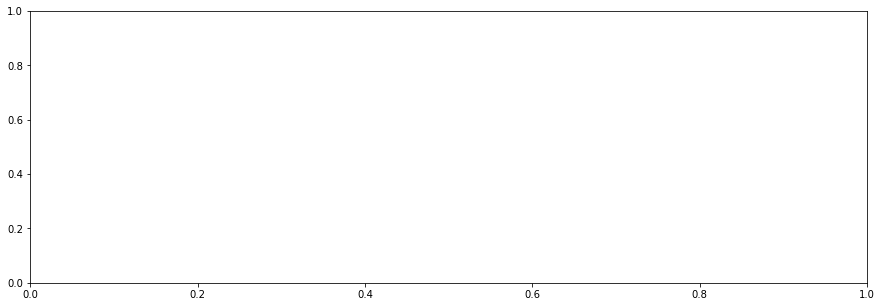

In [76]:
fig, ax = plt.subplots(figsize=(15,5))

drama_years = ratings_drama[['start_year']].groupby('start_year').count().index
drama_nums = ratings_drama['start_year'].value_counts().sort_index().values

nonfiction_years = ratings_nonfiction[['start_year']].groupby('start_year').count().index
nonfiction_nums = ratings_nonfiction['start_year'].value_counts().sort_index().values

comedy_years = ratings_comedy[['start_year']].groupby('start_year').count().index
comedy_nums = ratings_comedy['start_year'].value_counts().sort_index().values

action_years = ratings_action_scifi[['start_year']].groupby('start_year').count().index
action_nums = ratings_action_scifi['start_year'].value_counts().sort_index().values

horror_years = ratings_horror[['start_year']].groupby('start_year').count().index
horror_nums = ratings_horror['start_year'].value_counts().sort_index().values


ax.plot(drama_years, drama_nums)
ax.plot(nonfiction_years, nonfiction_nums)
ax.plot(comedy_years, comedy_nums)
ax.plot(action_years, action_nums)
ax.plot(horror_years, horror_nums);



# # Customize labels
# ax.set_title("Distributions of Movie Ratings by Genres")
# ax.set_xlabel("Movie Ratings")
# ax.set_ylabel("Number of Movies")
# ax.legend();

# Conclusion
***

# Next Steps
***

In [54]:
#for the actors and directors dataframes, split the known_for_titles columns into a list of titles
#this will make it easier to associate people with movies to get the ratings

imdb_directors['titles_list'] = imdb_directors['known_for_titles'].map(lambda x: x.split(','))
imdb_actors['titles_list'] = imdb_actors['known_for_titles'].map(lambda x: x.split(','))
imdb_actors['profession'] = 'Actor'
imdb_directors['profession'] = 'Director'

imdb_actors_two['titles_list'] = imdb_actors_two['known_for_titles'].map(lambda x: x.split(','))
imdb_actors_two['profession'] = 'Actor'

imdb_directors.head()


<ipython-input-54-2f352ed3aba6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_directors['titles_list'] = imdb_directors['known_for_titles'].map(lambda x: x.split(','))
<ipython-input-54-2f352ed3aba6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_actors['titles_list'] = imdb_actors['known_for_titles'].map(lambda x: x.split(','))
<ipython-input-54-2f352ed3aba6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,titles_list,profession
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445","[tt2590280, tt0352080, tt0216559, tt2057445]",Director
10,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162","[tt3501180, tt1485100, tt1358897, tt1387162]",Director
15,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director","tt1355327,tt1977735,tt0173525,tt1710520","[tt1355327, tt1977735, tt0173525, tt1710520]",Director
16,nm0066268,Steve Mitchell Beebe,NaN,NaN,"editorial_department,director,editor","tt0827928,tt0119961,tt0408417,tt5521860","[tt0827928, tt0119961, tt0408417, tt5521860]",Director
21,nm0068170,Dylan Bell,NaN,NaN,"director,actor,producer","tt4655766,tt3180116,tt8170168,tt4082762","[tt4655766, tt3180116, tt8170168, tt4082762]",Director


In [53]:
imdb_actors_two = imdb_names_dropna[imdb_names_dropna['primary_profession'] == 'actor']

In [8]:
#create a new dataframe that only contains people who are actors
#create a new dataframe that only contains people who are directors
imdb_actors = imdb_names_dropna[imdb_names_dropna['primary_profession'].str.contains('actor')]
imdb_directors = imdb_names_dropna[imdb_names_dropna['primary_profession'].str.contains('director')]
imdb_directors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
10,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162"
15,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director","tt1355327,tt1977735,tt0173525,tt1710520"
16,nm0066268,Steve Mitchell Beebe,NaN,NaN,"editorial_department,director,editor","tt0827928,tt0119961,tt0408417,tt5521860"
21,nm0068170,Dylan Bell,NaN,NaN,"director,actor,producer","tt4655766,tt3180116,tt8170168,tt4082762"


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [63]:
test_actors_rated[['primary_name', 'avg_movie_rating']].sort_values('avg_movie_rating', ascending=False).head(10)

,primary_name,avg_movie_rating
1195,Max Wrottesley,27.5
2354,Nassim Haramein,22.6
680,Bishnu Kharghoria,22.4
1984,Fabio Alessandrini,21.2
2025,John Arcilla,21.0
1043,Michael Smiley,19.9
735,Ravindra Mankani,18.3
2018,Philip Delancy,18.2
466,Seizô Fukumoto,18.2
1107,Royston Stoffels,18.0


In [61]:
#titles arent showing up in tconst 
test_row = imdb_actors_two.head(300)
test_row['avg_movie_rating'] = test_row['titles_list'].map(lambda x: find_rating(x))
test_row

test_actors_rated = test_row[test_row['avg_movie_rating'] != 0]

<ipython-input-61-57b36655f4c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_row['avg_movie_rating'] = test_row['titles_list'].map(lambda x: find_rating(x))


In [62]:
imdb_actors_rated = test_actors_rated[test_actors_rated['avg_movie_rating'] != 0]